# Topic-specific corpus building: The creation of a representative newspaper corpus on the topic of return migration using LDA and JSD




#### 0.1 Sarah Oberbichler
Author, University of Innsbruck 


#### 0.2 Eva Pfanzelter
Author, University of Innsbruck 

<div>
<img src="images/cover.png" width="1000"/>
</div>

This  work has  been  supported  by  the  European  Union  Horizon  2020  research  and innovation programme under grant 770299 (NewsEye).

Corpus Building, Return Migration, Historical Newspapers, Text Mining, Word Sense Disambiguation, Similiarity

Many researchers have the problem that their specialized corpora, created by keyword searches, either contain documents that are irrelevant to their research question because the search queries are too broad or, on the other hand, miss relevant documents because the search requests are too narrow. The reason for this is to be found in the difficult nature of language, which is characterized by ambiguity and concepts that are difficult, if not impossible, to trace by keyword search alone. This paper shows how text mining methods can support the building of a topic-specific corpus dealing with return migration issues. The aim is, on the one hand, to build a corpus that is as representative as possible and, on the other hand, to avoid complex keyword searches that are often influenced by the researcher's prior knowledge. The paper furthermore gives insights into the motivation and the challenges of corpus building and  gives an outlook on how the created corpus was used to conduct a qualitative, discourse-historical analysis on return migration from the Americas to Europe between 1850 and 1950.

## 1 Introduction

Historiography based on digital sources raises the need to search for complex patterns in masses of information rather than gaps in the historical record (Haber 2012). This development has led to a certain hybridity of classical and digital methods in historical research (Fickers 2020), and goes along with methodological and epistemological challenges for the historical disciplines. It also calls for an extension of the historical method, which guides historical understanding through the three steps heuristics, source criticism and interpretation (Leyh 1977). Especially the update on source criticism (which often goes hand in hand with tool criticism) has received much attention within the emerging field of digital hermeneutics (Fickers 2020) (Föhr 2017) (Koolen, van Gorp, and van Ossenbruggen 2019) (Pfanzelter 2010). Other parts of the historical method, like the critical assessment of adequate corpus creation in the heuristic research step, have so far not been considered enough. 

Historical research is often based on event- or topic-specific research questions, which is why corpus building is an essential aspect when working with digital sources. However, such corpora often result from time-consuming and complex search processes. Moreover, not every corpus is suitable for historical analysis. Historical corpus-driven/corpus-based studies (quantitative, but also qualitative) rely on the quality and representativeness of the selected collection to provide valid results. Here, a distinction is made between external and internal criteria for corpus design and composition (Corpas Pastor and Seghiri Domínguez 2010). An important external criterion is the quality of the sources. This refers, on the one hand, to the reliability of the sources and, on the other hand, to the Optical Character Recognition (OCR) quality of the data (e.g., if retro-digitized sources are being used). A second important external criterion is the representativeness of sources. In the case of digitized newspapers, this includes the question whether the used digitized newspapers are representative for the needs of the research project or if important newspaper issues are missing out.

An important internal criterion that affects the representativeness of topic-specific corpora is the number of documents in a collection (Corpas Pastor and Seghiri Domínguez 2010). To improve the completeness (not too many relevant documents are left out) and purity (not too many irrelevant documents are included) of corpora, is an overall goal when creating topic-specific corpora. Although the creation of a 'pure corpus' is an unattainable goal and there can be no such thing as a generically representative corpus (Raineri and Debras, 2019), we define representativeness as a factor that depends very much on the purpose of the corpus and on its ability to allow research questions to be answered without serious bias. In this paper, we rely on this definition while focussing on the internal criterion for representativeness (i.e., the size of the corpus).

When keywords are being used to create specialized collections, researchers often have to weight up between a collection that misses relevant articles, and one which contains noise (i.e. irrelevant texts). In other words, there is a conflict between creating a corpus that contains only relevant texts but not all relevant texts available in the entire collection and, on the other hand, creating a corpus that contains all available relevant texts, but at the expense of including many irrelevant texts (Chowdhury 2010) (Gabrielatos 2007). This is especially problematic when search terms are polysemous or ambiguous, as it is the case with German keywords related to return migration. 

This paper shows how a corpus created with ambiguous search queries related to return migration is successfully classified into relevant and irrelevant articles, i.e., disambiguated. A semi-supervised similarity-based WSD approach using Latent Dirichlet Allocation (LDA), a probabilistic model that calculates the probability distribution over terms (Blei, 2012) and the Jensen-Shannon Divergence (JSD), which measures the divergence between two probability distributions (Lin, 1991), was applied to reach this goal. Both approaches, the training of the LDA algorithm as well as the similarity measurements are unsupervised and based on the whole context of a document. Topics can capture the polysemous or ambiguous use of words, but they do not carry the explicit notion of the correct context that is necessary for WSD ( Boyd-Graber et al, 2007). Therefore, a training and feedback corpus with information (labels) on the “correct” or “incorrect” context (relevant or irrelevant  for the research project) was created for document comparison and clustering. The document labels do not play a role in training the LDA algorithm and finding the most similar set of documents in the feedback corpus, however, they allow the calculation of the overall relevance of the retrieved most similar set of documents based on the numeric labels. This calculation is used to support the final classification into relevant or not relevant documents, as explained step by step in the hermeneutics layers of this paper.

The motivation of this paper and its underlying hermeneutics steps are to present and describe this process and to exemplary show how the created corpus was used to conduct a qualitative, discourse-historical analysis on return migration from the Americas to Europe between 1850 and 1950. Discourse analysis has always relied on text corpora, and with ever-increasing corpora, automated corpus-driven approaches (such as the calculation of multi-words units) promise to support qualitative interpretative steps in the frame of discourse analysis (Bubenhofer, 2008) (Steyer and Lauer, 2007). Less researched but equally effective are digital methods to support the corpus building, which is why we show how the quality and representativeness of a corpus can be improved using Natural Language Processing (NLP) methods. In doing so, we present a corpus building method to support humanities research, which means that the focus lies on solving a specific problem and not on a comparison or evaluation of different approaches or methods. And although the discussion will draw on the work carried out as part of this project, the approach presented in this paper can be adapted for research projects that deal with similar corpus building issues.

## 2 Return migration in historical newspapers

News coverage on return migration - which can generally be defined as “cross-border migration to the country of origin” (Currle 2006)  - is manifold: Reports on remigration and repatriation give insights into special events, letters from returnees printed in newspapers give glimpses into the thoughts of returnees, appeals give an insight into support efforts, and small advertisements give an idea of what was sold or searched for in connection with return migration. Just as immigration, return migration has always also been a question of negotiation. Especially in reports, letters and appeals we find several characteristic argumentative discourses (discourses can be described as a ‘group of statements that belong to a single system of formation’ (Foucault, 1969)) on return migration, which include (implicit) arguments to support, promote, regulate or prohibit the return of people to their country to origin. Chapter 4.1 gives deeper insights into discourses that accompanied return migration movements. 

<table>
  <tr>
     <tr>
    <td>Figure 1: Das interessante Blatt, 12.12.1907, p. 1. </td>
    <td>Figure 2: Völkischer Beobachter, 15.10.19140, p. 3.</td>
  </tr>
    <td>
      <img src="images/return_migration.png" alt="Drawing" style="width: 400px";>
    </td>
    <td>
      <img src="images/rückwanderer.png" alt="Drawing" style="width: 400px;">
    </td>
    <td>


</table>

### 1.2 The motivation for corpus building

Newspapers are the ‘predominant social field' for the creation of information, beliefs or arguments, which are necessary ‘for establishing and sustaining economic, social and political systems and orders (Fairclough 2013). While historical return migration movements have been little researched in scholarly contexts, newspapers indicate that return migration has certainly been an important topic within historical migration processes – also in recent times. Examples include the return from overseas in the 19th and 20th century, the return of war veterans or the repatriation of war refugees during and after the First World War, or the return and repatriation of prisoners of war, refugees, exiles, concentration camp survivors, etc. during and after the Second World War. The main motivation, therefore, was to produce empirical material for further qualitative and qualitative analysis on the topic of return migration. The research questions are as follows: What discourses accompanied the newspaper reporting on return migration. Where return migrants welcomed or perceived as a burden and thread when returning back to their country of origin? Can differences between groups of returning migrants be identified and have there been changes over the time? How did returnees depict themselves? 

In scientific literature, migration was often viewed as a one-way process, beginning with the ‘uprooting’ of people at the point of origin and ending with ‘assimilation’ into their adopted culture and country. (Steidl 2017) phrased this as follows: “Although temporary and circular migration patterns are of a special importance for European people in modern times, they were neglected by migration research for decades”. Still, recent research indicates that many people left their home countries with the notion of returning home at a certain point not so far in the future. This is also true for those who left their home voluntarily to resettle in other countries. Migration is therefore neither a linear process, nor is a model that goes in both directions appropriate. In many cases, emigrants returned only temporarily and left their country of origin again after a while.

Historical research on return migration considers such patterns of, and motivations for, return migration (Wyman, 2001), examines historical, political, sociological or economic backgrounds (Harper, 2012; Olivier, 2013; Poznan, 2017) or deals with autobiographical questions (Prager & Straub, 2017a). So far, however, the complexity and heterogeneity of sources about return migration has complicated a structured analysis of the topic of return migration. The historical constellations were so diverse that generalizations are difficult to make and thus inherently faulty. What adds to the difficulties is the lack of empirical material.The compilation of a corpus of empirical material (such as newspaper articles) is therefore still an essential factor if the topic of remigration is to be accessible for research.

### 1.3 The challenges

As mentioned earlier, keyword searches often return a significant amount of irrelevant results or exclude too many relevant results. A common reason for this is to be found in the difficult nature of language. Synonymy and polysemy complicate keyword searches, but not alone. Word inflections, and concepts that do not equate to single words also play a significant role, too (Oberbichler and Pfanzelter, 2021).

Return migration as defined before and and the concepts associated with it are difficult to trace by keyword searches because of the following reasons:

1. Concepts are difficult to find using single keywords alone: There are only a few terms that lead to exclusively relevant articles on return migration, such as 'Rückkehrer', 'Heimkehrer' or 'Rückwanderer' (all German terms for 'returnee'). However, they only cover a small amount of the whole spectrum of return migration news coverage. Return migration in the German language is often also expressed by verbal constructions such as "kehrten in die Heimat zurück" (returned home) or phrases such as 'Rückkehr der Emigranten' (return of the emigrants).

2. Word flexions complicate phrase searches or the combination of search terms: Phrase searches such as 'heimkehrende Auswanderer' (returning emigrants) or the combination of keywords that occur together in a defined word distance such as "Rückkehr ... Auswanderer" (return ... migrants) in a distance of k words, are another way to improve the representativeness of a corpus. However, they involve a number of challenges; Firstly, it is difficult to find all kind of different combinations that would represent the topic in an adequate way. Secondly, it would be very time-consuming to consider all possible word flexions. Finally, even if it were possible to cover the topic of return migration in its entirety, many of the word combinations (e.g., "heimat zurückkehren" (returning home) would lead again to results that are not relevant for the research project.

3. Words have different meanings in different contexts (ambiguity): Expanding the search to more ambiguous words such as “Heimkehr” (returning home) or “Rückkehr” (returning back)  helps to find more relevant articles but often leads to a considerable amount of irrelevant search results as well. The process of identifying the actual meanings of words can be considered as one of the most challenging problems in NLP. The following texts show examples of relevant and non relevant articles on the topic of return migration found by using ambiguous search terms. The first newspaper clipping of the Austrian newspaper *Innsbrucker Nachrichten* from May 1913 contains the search term "Rückwanderung" and reports about the return of Slavic workers from America (Return migration to the Balkan states. We received a letter from Bregenz on the 7th of this month. For some days now one has been able to observe many Slavic workers returning from America to their homeland, the Balkan states, on the Lake Constance ships and railway trains). This article is relevant for the present research project:

In [102]:
import pandas as pd
import re
import re, numpy as np, pandas as pd
import csv
from pprint import pprint
df = pd.read_csv('data/export_returnmigration_16_04_2021_21_35.csv', usecols = ['text','relevancy'])
df['text'][41].replace("\n"," ")

"Der Balkankrteg. Rückwanderung in die Balkanstaaten. Aus Bregenz schreibt man uns vom 7. d. M.. Seit einigen Tagen kann man auf den Bodenseeschiffen und Eisenbahnzügen viele sla wische Arbeiter beobachten, die aus Amerika in ihre Heimat, in die Balkanstaaten, zurückkehren. Nach Aussage eines Auswandereragenten haben diese Staaten, welchen der Krieg viele Männer entrissen hat, eine große Aktion eingeleitet, um die in Amerika ansässigen Landeskinder zur Heimkehr zu bewegen. Auch von den in den Rheinischen Arbei'sgebieten beschäftigten Slawen kehren viele zurück. Der Heimatnaat gewährt ihnen im Wege der eigenen Konsulate weitestgehende Unterstützungen an Geld und Mitteln zur Gründung eines eigenen Herdes. Die Schiffe bringen viele solcher Rückwanderer über Konstanz und Württemberg hieher."

The second article of the *Neue Freie Presse*, written in March 1935, contains the word "Rückwanderung" as well, but reports on the return of foreign fonts from England as well as on the return of money from the United States (For example, the fixing of the relation between the price of gold and the price of the dollar last year brought about a considerable return of American money to the United States.) This article was labeled as not useful for the research project on human return migration.

In [103]:
df['text'][111].replace("\n"," ")

'London. von Auslandgeldern aus Londoner Dienst der „Neuen Freien Presse“. London, 4. März. „Times“ schreibt über die Sterlingverkäufe auf den ausländischen Märkten: Das neue Abgleiten des Pfundkurses, das nun auf die etwa 1Oprozentige Abwertung des Jahres 1934 folgt, ist hauptsächlich eine Folge der Rückwanderung der ansländischen Fonds, die in den Jahren 1932 bis 1933 in sehr hohen Beträgen nach London gesandt worden waren. Die Umkehrung dieser Bewegung hat verschiedene Ursachen. Zum Beispiel hat die Fixierung der Relation zwischen Gold= und Dollarpreis im vorigen Jahr eine beträchtliche Rückwanderung amerikansschen Geldes nach den Vereinigten Staaten mit sich gebracht. Ein weiterer Faktor, der zur Abschwächung des Pfundes beitrug, ist die niedrige Zinsrate in London im Verhältnis zu jeuer der Goldblockländer.'

All these challenges make it necessary to consider more advanced and complex techniques for the corpus compilation.

## 2 Methods to improve the representativeness of specialized corpora

There are a number of methods to improve the representativeness of specialized corpora. Search techniques such as Boolean queries from the area of information retrieval, for example, can be a great help to refine searches and to find relevant information. However, for the creation of topic-specific corpora, the search for texts containing specific information (e.g., a combination of words) can impose bias (Chowdhury, 2004). Another method that draws on techniques used in information retrieval is the Relative Query Term Relevance (RQTR) method. RQTR is an approach to formulate a complex query for a topic-specific corpusa by calculating the degree of precision and recall of a query. This means that the RQTR method is based on the combination of keywords (candidate term and core query) calculating the relevance of the candidate term (e.g., the relevance of the term Hamas for the topic on refugees). If a candidate term has a clear positive RQTR score, it can add more relevant texts to a corpus. If the score is negative, it would add too much noise to a corpus (Gabrielatos, 2007). This approach can also be adapted to reduce the issue of polysemous query terms, as Daniel Malone (2020) suggests. In this case the RQTR method was used to find good keywords which were combined with an ambiguous search term to reduce the number of irrelevant articles. This method, however, can be very time-consuming and also influenced by the researcher’s choice of candidate terms. Finally, Word Sense Disambiguation (WSD) from the Natural Language Processing (NLP) area includes methods that are meant to disambiguate polysemous search terms. WSD can be described as a "task of associating the correct meaning with a word in a given context" (Pasini and Navigli, 2020). WSD techniques further can be knowledge-based (e.g., based on dictionaries), supervised (uses machine-learning technique from manually annotated data) or unsupervised. Unsupervised WSD methods assume that similar senses occur in similar contexts (Pal and Saha, 2015; Navigli 2009) and learn from unlabelled text.

Word Sense Disambiguation (WSD) can overcome some of the above mentioned challenges. They derive the actual meanings of ambiguous words, and their underlying concepts, rather than by simply matching character strings like keyword search technologies (Pasini and Navigli, 2020). Both topic modeling and the Jensen Shannon Divergence method are used in the context of WSD. Topic modeling as a method for WSD has been described, for example, by Boyd-Graber, Blei and Zhu (2007). They proposed an approach to use “words that share the same hidden topic across many documents” for disambiguation rather than sentence-level or the document-level. Word and context similarity measures for WSD have been evaluated and proposed since a long time. Karov and Edelman (1998), for example, presented a method to find similar contexts (assuming words to be similar if they appear in similar sentences) by computing similarity between the original context of a word and similar sentences in a feedback set. Further similarity based methods for WSD were presented by Dagan, Lee and Pereira (1997), as well as by Patwardhan et al. (2003). The combination of LDA and JSD to group similar articles, documents or groups of documents has been further described in several computer science research papers (Fothergill et al., 2016; Lu et al., 2020; Niekler & Jähnichen, 2012).

## 3 Creating a newspaper corpus on historical return migration movements using text mining methods

In order to use machine learning to support the building of a representative corpus on return migration, this process started with the creation of a manually annotated training (and feedback) and testing collection - containing relevant as well as non-relevant articles for the topic of return migration. The training/feedback and testing corpus was created with the beta version of the NewsEye Platform (Jean-Caurant & Doucet, 2020). This platform allows to create and manage datasets, to add annotations as well as to export the dataset. In total, 208 newspaper clippings were collected, annotated and exported from the NewsEye platform using following search terms: "Rückkehr" (returning back), "Heimkehr" (returning home), "heimgekehrt*" ((people who) returned home), "Rückwanderer" (returnees), "Rückwanderung" (return migration), "Heimkehrer" (returnees), "heimkehrend*" ((people who) are returning). Four Austrian newspapers, which where provided by the National Library of Austria (ONB) in the context of the NewsEye project, were used for the manually created corpus: The Neue Freie Presse, the Arbeiter-Zeitung, the Illustrierte Kronen Zeitung and the Innsbrucker Nachrichten. 

Attention was paid to ensuring that the collection was representative and of high quality. For representativeness, full newspaper articles from different eras between 1850 and 1950 were considered (also articles where return migration was only a subordinate topic), making sure no important return migration movement was left out. The high quality of Optical Character Recognition (OCR) of the newspaper issues in the platform, on the other hand, allowed it to not have to count with bigger distortions caused by OCR errors. Within the NewsEye project, a dataset of some 1.5 million pages from the participating national libraries of Austria, France, and Finland was re-OCRed with Transkribus, using several specifically trained models that were improved by computer scientists of the project at the University of Rostock. The process led to impressive improvements in OCR quality when compared to the text currently available for the same newspapers, producing output with character error rates below 1 % (cite deliverable).

The search and the building of the sample collection was performed with the beta version of the <a href="https://platform.newseye.eu" target="_blank">NewsEye Platform</a> (Jean-Caurant & Doucet, 2020). This platform allows to create and manage datasets as well as adding annotations to the dataset.

## Creating a manually annotated collection

Thanks to layout segmentation and article separation, which device OCRed (Optical Character Recognized) text into news-units in the NewsEye platform, it was possible to find and extract newspaper clippings on the topic of return migration. Layout segmentation and article separation for newspapers, however, are still highly error-prone, and computer scientists from the University of Rostock are constantly working on improving automated article separation, the task to computationally identify articles the same way as humans do, remains challenging. In the meantime, to meet the problem of under-/over-segmentation of articles, functionalities that allow to manually merge text blocks have been proven as very useful. For the creation of smaller datasets and subcollections, this is a highly relevant feature, because it allows to create high quality training and testing corpora as it has been done for the project on return migration. Dataset functions further allow to create and organize collections, to mark them as relevant, less relevant or not relevant, and to export a collection as a Zip, JSON or CSV file, which make it possible to import the collection within a coding environment such as Jupyter Notebooks. As can be seen in Figure 3, a total number of 125 articles were manually annotated as relevant (by assigning the number 3) and 82 articles were annotated as irrelevant (by assigning the number 0). While creating and annotating the dataset, value was placed on the representativity of the collection (in covering all possible topics and time frames).

In [104]:
df.head(10)

,relevancy,text
0,0,"Die Lleche, Fante umt ja shoarz. de D fiunz i..."
1,0,* Ueber die Kohlenlager auf Spitzbergen wird\n...
2,0,(Nächtliche Ruhestörer.) Aus Lana berichtet ma...
3,3,* Reisegebühren der Heimkehrer. Die aus der\nK...
4,3,"Die Regierung in Polen.\nWarschan, 23. Oktober..."
5,3,sitzsteuer — wäre den Ländern und den Gemeinde...
6,3,"Wien, 11. Jannar.\n[Deutsch=ungarische Schiffa..."
7,3,"Zu den Forderungen, deren Befriedigungsfonds i..."
8,3,Der Rechtsvertrag mit Rußland.\nAuch mit Rußla...
9,3,Ueber den Verkehr zwischen den besetzten\nund ...


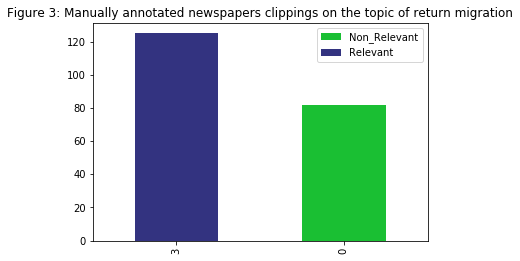

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
my_colors = [(0.20,0.200,0.50), (0.100, 0.75, 0.200)]

df.relevancy.value_counts().plot(kind='bar', color = (0.100, 0.75, 0.20))
df.relevancy.value_counts().plot(kind='bar', color = my_colors)

plt.legend(['Non_Relevant', 'Relevant'])

plt.title('Figure 3: Manually annotated newspapers clippings on the topic of return migration')
plt.show()

## Cleaning, tokenizing and stemming the text 

Before Natural Language Processing (NLP) methods can be applied, the text must be cleaned (discarding punctuation and capitalization of words, removal of stop words, lower case the text), tokenized (breaking text into individual linguistic units) and stemmed (reduction of inflected words to their root words). A further preprocessing step that could be applied is lemmatization (converting words to their lemma form/lexeme). This step, however, had a negative effect on the final result.  The list of German stop words provided by the NLTK package was extended to include more words, which, on the other hand, improved the final results considerably. Therefore, a longer list of German stop words was retrieved from https://countwordsfree.com/stopwords/german and added to the existing list. In addition, highly frequent words such as the search terms (e.g., "Rückkehr*" (return)) were also filtered out. 

In [106]:
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import FreqDist
import spacy

# Functions to clean and tokenize the data
def initial_clean(text):
    text = re.sub(r'[^\w\s]','',text)
    text = text.lower() 
    text = nltk.word_tokenize(text)
    return text

#Remove stop words
nltk.download('stopwords')
nltk.download('punkt')

stop_words = stopwords.words('german')
# add stop words manually
stop_words.extend(["Heimkehr", "Rückkehr", "heimkehren", "zurückkehren", "a", "ab","aber","ach","acht","achte","achten","achter","achtes","ag","alle","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","außer","ausserdem","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","besten","bin","bis","bisher","bist","c","d","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darüber","darum","darunter","das","dasein","daselbst","dass","daß","dasselbe","davon","davor","dazu","dazwischen","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","d.h","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","dürfen","dürft","durfte","durften","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","Ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","f","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","groß","grosse","große","grossen","großen","grosser","großer","grosses","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hätte","hatten","hätten","heisst","her","heute","hier","hin","hinter","hoch","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","können","könnt","konnte","könnte","konnten","kurz","l","lang","lange","leicht","leide","lieber","los","m","machen","macht","machte","mag","magst","mahn","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","möchte","mochten","mögen","möglich","mögt","morgen","muss","muß","müssen","musst","müsst","musste","mussten","n","na","nach","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","Ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","Schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollte","sollten","sondern","sonst","sowie","später","statt","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","über","überhaupt","übrigens","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","von","vor","w","wahr?","während","währenddem","währenddessen","wann","war","wäre","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","wessen","wie","wieder","will","willst","wir","wird","wirklich","wirst","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","würde","wurden","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","euer","eure","hattest","hattet","jedes","mußt","müßt","sollst","sollt","soweit","weshalb","wieso","woher","wohin"])
def remove_stop_words(text):
    return [word for word in text if word not in stop_words]

#Stemming
stemmer = PorterStemmer()
def stem_words(text):
    try:
        text = [stemmer.stem(word) for word in text]
        text = [word for word in text if len(word) > 1] 
    except IndexError: 
        pass
    return text

#Apllying all functions 
def apply_all(text):
    return stem_words(remove_stop_words(initial_clean(text)))

df['tokenized'] = df['text'].apply(apply_all) 
df.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\c62255\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\c62255\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,relevancy,text,tokenized
0,0,"Die Lleche, Fante umt ja shoarz. de D fiunz i...","[llech, fant, umt, shoarz, de, fiunz, nachng, ..."
1,0,* Ueber die Kohlenlager auf Spitzbergen wird\n...,"[ueber, kohlenlag, spitzbergen, deutschen, blä..."
2,0,(Nächtliche Ruhestörer.) Aus Lana berichtet ma...,"[nächtlich, ruhestör, lana, berichtet, 13, 14,..."
3,3,* Reisegebühren der Heimkehrer. Die aus der\nK...,"[reisegebühren, heimkehr, kriegsgefangenschaft..."
4,3,"Die Regierung in Polen.\nWarschan, 23. Oktober...","[regierung, polen, warschan, 23, oktob, kabine..."
5,3,sitzsteuer — wäre den Ländern und den Gemeinde...,"[sitzsteuer, ländern, gemeinden, zuzuweisen, u..."
6,3,"Wien, 11. Jannar.\n[Deutsch=ungarische Schiffa...","[wien, 11, jannar, deutschungarisch, schiffahr..."
7,3,"Zu den Forderungen, deren Befriedigungsfonds i...","[forderungen, befriedigungsfond, milliarden, g..."
8,3,Der Rechtsvertrag mit Rußland.\nAuch mit Rußla...,"[rechtsvertrag, rußland, rußland, zusatzvertra..."
9,3,Ueber den Verkehr zwischen den besetzten\nund ...,"[ueber, verkehr, besetzten, besetzten, gebiete..."


## Splitting the collection into a training and a testing corpus

In a second step, the collection was divided into a training and a test corpus using a mask of binary values. To do this, the numpy.random.rand() function was used to create an array with a specific shape and fill it with random values. This made it possible to get a good mix of relevant and non-relevant articles in each of the corpora. As this function is based on randomness and the split of the corpora can vary with each call, a seed was set to create reproducible calls. This means that all random numbers generated after setting the seed are the same on each machine.

The training corpus contains 123 articles, 75 of which are relevant and 48 irrelevant.
The test corpus consists of 84 articles, 50 of which are relevant and 34 irrelevant.


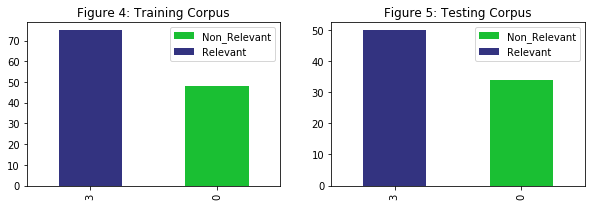

In [107]:
my_colors = [(0.20,0.200,0.50), (0.100, 0.75, 0.200)]

np.random.seed(1)
msk = np.random.rand(len(df)) < 0.599
train_df = df[msk]
train_df.reset_index(drop=True,inplace=True)
test_df = df[~msk]
test_df.reset_index(drop=True,inplace=True)


fig, axes = plt.subplots(1,2,figsize=(10,3))
test_df.relevancy.value_counts().plot(kind='bar', color = (0.100, 0.75, 0.20), ax=axes[1])
test_df.relevancy.value_counts().plot(kind='bar', color = my_colors, ax=axes[1])
train_df.relevancy.value_counts().plot(kind='bar', color = (0.100, 0.75, 0.20), ax=axes[0])
train_df.relevancy.value_counts().plot(kind='bar', color = my_colors, ax=axes[0])
axes[1].legend(['Non_Relevant', 'Relevant'])
axes[0].legend(['Non_Relevant', 'Relevant'])
axes[1].title.set_text('Figure 5: Testing Corpus')
axes[0].title.set_text('Figure 4: Training Corpus')



print(f"The training corpus contains {len(train_df)} articles, {train_df.relevancy.value_counts()[3]} of which are relevant and {train_df.relevancy.value_counts()[0]} irrelevant.")
print(f"The test corpus consists of {len(test_df)} articles, {test_df.relevancy.value_counts()[3]} of which are relevant and {test_df.relevancy.value_counts()[0]} irrelevant.")   

## 3.1 Applying LDA and the Jensen Shannon Divergence (JSD) to classify the testing corpus into relevant and irrelevant articles

In order to be able to separate relevant from irrelevant documents, LDA was used to group words and similar expressions that best characterize relevant or irrelevant documents and to provide every article with information on their topic distribution. The Jensen-Shannon Divergence (JSD) method, on the other hand, was used to measure the similarity between the topic distribution of documents. While the training and feedback corpus was used to train the topic modeling algorithm, the test corpus helped to test the efficiency of the similarity measure.

## Training the Latent Dirichlet Allocation (LDA) algorithm

For the text classification, Latent Dirichlet Allocation (LDA), which belongs to the broader category of methods called topic models, was used to group semantically related words (Blei, Ng, & Jordan, 2003). For the topic on return migration, a high number of topics (250 in this case) leads to better results, while for chunksize (the number of documents to consider) was adapted to the size of the dataset (200). In order to represent each document by a small number of topics, a low alpha value was chosen. Low beta, on the other hand, means that each topic is only represented by a small number of words. The function random_state serves as a seed in order to make it possible to reproduce the training process. The following example shows the 20 top words of topic number 10. It reflects on mass return migration movements of millions of people to specific counties or cities. This topic is clearly connected to return migration.

In [108]:
import gensim
from gensim.models import LdaModel
from gensim import models, corpora, similarities
import gensim.corpora as corpora
import gensim, spacy, logging, warnings
from gensim.models import CoherenceModel
from gensim.utils import lemmatize, simple_preprocess

def train_lda(data):
    num_topics = 250
    chunksize = 200
    dictionary = corpora.Dictionary(data['tokenized'])
    corpus = [dictionary.doc2bow(doc) for doc in data['tokenized']]
    lda = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,
                   alpha=0.2e-2, eta=0.5e-2, chunksize=chunksize, minimum_probability=0.0, passes=5, iterations=200, random_state=14)
    return dictionary,corpus,lda
dictionary,corpus,lda = train_lda(train_df)
print(lda)
lda.show_topic(topicid=10, topn=20)

LdaModel(num_terms=10097, num_topics=250, decay=0.5, chunksize=200)


[('land', 0.040727224),
 ('millionen', 0.030635638),
 ('personen', 0.030566204),
 ('städten', 0.02058588),
 ('landbezirken', 0.020506345),
 ('flachen', 0.020477165),
 ('rückwanderungsüberschuß', 0.010341919),
 ('großstädt', 0.010334778),
 ('ergeben', 0.010331114),
 ('1932', 0.01032976),
 ('glich', 0.010321264),
 ('verlust', 0.01031539),
 ('656000', 0.010296056),
 ('dürfte', 0.010289842),
 ('umkehr', 0.010289561),
 ('1924', 0.010285091),
 ('inneramerikanischen', 0.010284919),
 ('gesamtemigr', 0.010271983),
 ('betrug', 0.010269103),
 ('wanderten', 0.010268608)]

## Finding the dominant topic for each article 

In this step, the dominant topic for each article is calculated. As can be seen in Table ... , topic 10 (which is clearly connected to return migration as seen in the last step), is most dominant in document number 43. 

In [109]:
def format_topics_sentences(ldamodel=None, corpus=corpus, relevancy=df['relevancy']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list   
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for s, (topic_num, prop_topic) in enumerate(row):
            if s == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add relevancy to the end of the output
    contents = pd.Series(relevancy)
    
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda, corpus=corpus, relevancy=df['relevancy'])


# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Relevancy']
df_dominant_topic[43:49]


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Relevancy
43,43,10.0,0.9893,"land, millionen, personen, städten, landbezirk...",3
44,44,243.0,0.9922,"gauleit, gau, ostmark, prachatitz, heimat, bay...",3
45,45,136.0,0.9928,"generalfeldmarschal, großdeutschland, könnten,...",3
46,46,59.0,0.9797,"oesterreich, rückwander, flüchtling, verlassen...",0
47,47,152.0,0.9955,"dö, nit, göd, jo, wo, ober, weard, goudl, di, ...",0
48,48,11.0,0.9877,"pg, bauhof, spielen, linz, lask, wiener, heimk...",0


## Visualizing the relationship of dominant topics and relevance labels

In order to see how well the dominant topics are separated between relevant (3) and non-relevant (0) articles, a network visualization was plotted using the Python packages Pandas and Networkx. For the network visualization, the most dominant topic for each newspaper clipping in the training corpus was determined. This makes it possible to visualize relevant and non relevant newspaper clippings together with their dominant topics. This visualization helps to see how effective the model was trained. The fewer articles share the same dominant topics, the better the results. Also topic number 10 can be found in the visualization, clearly connected to articles labeled as relevant (=3). 

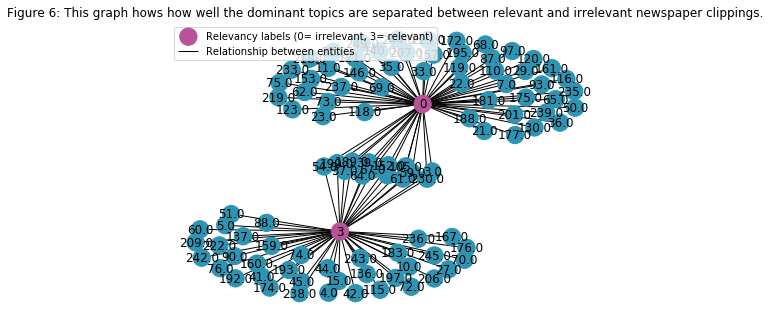

In [110]:
import networkx as nx
import seaborn as sns
import sys

df_dominant_topic.to_csv('topic_relevancy.csv')
import csv
with open('topic_relevancy.csv',  encoding="utf8") as infile:
    reader = csv.reader(infile)    
    csv_data = list(reader)
df_dominant_topics= pd.read_csv('topic_relevancy.csv', usecols = ['Dominant_Topic', 'Relevancy'])
list_topic = []
for key in csv_data: 
    list_topic.append(key[2])
topic = list_topic[1:]

list_relevancy = []
for key in csv_data:
    list_relevancy.append(key[5])
relevance = list_relevancy[1:]   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Build a dataframe with 4 connections
df = pd.DataFrame({ 'from': relevance, 'to': topic})

# Build your graph   
G = nx.from_pandas_edgelist(df, 'from', 'to')
color_map = []
for node in G:
    if node == "3":
        color_map.append('#b85399')
    if node == "0":
        color_map.append('#b85399')
    else: 
        color_map.append('#2d95b3') 
# Plot it
nx.draw(G, with_labels=True, node_color=color_map)
plt.legend(('Relevancy labels (0= irrelevant, 3= relevant)', 'Relationship between entities'),
           loc='upper left')
plt.title('Figure 6: This graph hows how well the dominant topics are separated between relevant and irrelevant newspaper clippings.')
plt.show()


Topic models are based on the assumption that a relatively small set of latent topics underlies natural language texts, where a word may belong to several topics. Topic models use the so-called bag-of-words assumption within a document, while documents can be “represented as random mixtures over latent topics, where each topic is characterised by a distribution over words”, as described by Blei et al. (2003). While several statistical algorithms for topic modeling exist, LDA was chosen for this approach because it has shown a good ability to cluster documents (Lu et al., 2020). When using LDA, it needs to be highlighted that the model results are not deterministic. Results are always affected by both, the choice of parameters and the built-in stochastic process. Maier et al. (2018) therefore proposed following guidelines in order to increase reliability, interpretability, and validity of LDA models: 1) Cleaning and preprocessing steps need to be used reasonably as well as in a correct order. A good knowledge of the corpus and close reading of results helps to decide on which steps work well. 2) The selection of LDA parameters is crucial (Maier et al., 2018). The number of topics depends on the corpus and on the research project. Topic modeling, for example, is used for various needs: understanding given topics in a corpus, getting a better insight into the type or genre of documents in a corpus (news, advertisement, etc.), capturing the evolution of topics and trends within multilingual collections (Zosa and Ganroth-Wilding, 2019), or comparing different corpora (Lu et al., 2020). Each of these application areas needs different parameters. While methods to automatically determine the topic number can be helpful in some cases (e.g., Zhao et al., 2020; O’Callaghan, 2015), close reading a considerable amount of documents and words remains most reliable. Finally, 3) Results from topic models are the beginning, not the end of an analysis (Maier et al. 2018). Interpreting the results of topic modelling, for example, as stable thematic discourses, should be viewed critically. Nevertheless, topic modeling does a great job in clustering, which is why it is well suited for corpus building approaches. 

Just like LDA, JSD also depends on decisions of the researcher, though far less. For example, it needs to be decided on how many of the most similar texts within the training and feedback set are retrieved and used for feedback on the relevancy. LDA measures which documents are statistically “closer” (and therefore more alike) by comparing the divergence of their topic distributions. The smaller the distance, the more similar two articles are (Lin, 1991). Consequently, the topic distribution of each new article (from the test corpus) is compared to the topic distribution of all articles in the feedback set and the ten most similar articles from the feedback set are retrieved. If 60 percent of those articles were labeled as relevant, the new article was marked as relevant, too. Otherwise it was marked as irrelevant (Figure … )

<table><tr>
    <caption align="top">Figure 7: This example shows the recommendation of the ten most similar articles for one unseen article of the test corpus. The relevance levels tell whether the articles were manually classified as relevant or as irrelevant. </caption>
    <td> <img src="images/figure.png" alt="Drawing" style="width: 700px;"/> </td>
</tr></table>

## Finding similar articles in the training corpus using the Jensen-Shannon function

The topic distributions for each document obtained are used to calculate the degree of similarity between documents by using the JSD method. The first function implements a Jensen-Shannon similarity between the input query (an LDA topic distribution for a document) and the entire corpus of topic distributions. It returns an array of length M where M is the number of documents in the corpus. The second function implements the Jensen-Shannon distance above and returns the top k indices of the smallest Jensen-Shannon distances. For example, for the here shown and so far unseen article from the testing corpus, which talks about Russian returnees returning from America to Europe, 10 most similar documents from the training corpus were retrieved. Those documents carry the information on the relevancy,as can be seen in the dataframe. Since more than 60 percent of the most similar articles were annotated as relevant, the article will be classified as relevant. This process will be carried out for all articles in the testing corpus.   

In [111]:
from scipy.stats import entropy
def jensen_shannon(query, matrix):
    p = query[None,:].T 
    q = matrix.T 
    m = 0.5*(p + q)
    return np.sqrt(0.5*(entropy(p,m) + entropy(q,m)))
def get_most_similar_documents(query,matrix,k=10):
    sims = jensen_shannon(query,matrix) 
    return sims.argsort()[:k] 


#lists for the output

text_relevant = []
number_relevant = []
text_non_relevant = []
number_non_relevant = []

#most similar articles

bow = dictionary.doc2bow(test_df.iloc[6,2])
doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=bow)])
doc_topic_dist = np.stack([np.array([tup[1] for tup in lst]) for lst in lda[corpus]])
doc_topic_dist.shape
sim_ids = get_most_similar_documents(doc_distribution,doc_topic_dist)
similar_df = train_df[train_df.index.isin(sim_ids)]
print(test_df.iloc[6,1])
print("\n")
similar_df

In der holländischen
Hafenstadt Rotterdam
und in ganz Holland
erregt das Schicksal der
russischen Rückwanderer
viel Aufsehen, die an
Bord des Dampfers
„Volturno“ der
Uranium=Linie aus
Amerika nach Europa
zurückgekommen waren
und von den deutschen
Behörden daran gehindert wurden, durch
deutsches Gebiet nach
Rußland zu reisen. Diese
56 Russen konnten nämlich die von den preußischen Behörden verlangten Dokumente (Durchfahrkarten bis Wirballen
und russische Grenzpässe)
nicht vorweisen. Die
armen Leute mußten
also, als der „Volturno“
Rotterdam verließ, wieder an Bord gehen, der
Kapitän aber ließ sie
nochmals ausschiffen.
Jetzt werden die Rückwanderer auf Kosten der
Uranium= Dampfschifffahrts=Gesellschaft verpflegt. Wie sich ihr
Schicksal weiter gestalten
wird, muß sich erst noch
entscheiden.




,relevancy,text,tokenized
7,3,Der Rechtsvertrag mit Rußland.\nAuch mit Rußla...,"[rechtsvertrag, rußland, rußland, zusatzvertra..."
27,3,"Krakau, 17. November. Auf dem hiesigen Bahnhof...","[krakau, 17, novemb, hiesigen, bahnhof, neuerl..."
29,0,"Triest, 26. Juli. (Privat.) An Bord des die sy...","[triest, 26, juli, privat, bord, syrisch, lini..."
36,3,* Rückwanderer aus Amerika. Samstag früh sind\...,"[rückwander, amerika, samstag, früh, 250, amer..."
73,0,stefft hajek: Mein Dackel erzählt...\nEine wah...,"[stefft, hajek, dackel, erzählt, wahr, geschic..."
81,0,[Besuch österreichischer Officiere bei einer\n...,"[besuch, österreichisch, officier, russischen,..."
89,3,Deutsche Schritte wegen des\nZwischenfalles vo...,"[deutsch, schritt, zwischenfal, gifon, berlin,..."
96,3,"chon unterwegs, eine kleine Anzahl Schweine un...","[chon, unterweg, anzahl, schwein, schafe, trei..."
111,3,Hunderttausende unserer Soldaten sind im Verla...,"[hunderttausend, soldaten, verlauf, krieg, rus..."
115,3,Dieser Antrag wurde mit 14 gegen 10 Stimmen an...,"[antrag, 14, 10, stimmen, ueber, verfassungsau..."


In [112]:
# Classify into relevant and irrelevant
index = 0
while index < len(test_df) -1:
    index +=1
    new_bow = dictionary.doc2bow(test_df.iloc[index,2])
    new_doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=new_bow)])
    doc_topic_dist = np.stack([np.array([tup[1] for tup in lst]) for lst in lda[corpus]])
    doc_topic_dist.shape
    most_sim_ids = get_most_similar_documents(new_doc_distribution,doc_topic_dist)
    most_similar_df = train_df[train_df.index.isin(most_sim_ids)]
    relevant = []
    if sum(most_similar_df['relevancy']) > 17: 
        text_relevant.append(test_df.iloc[index,1])
        number_relevant.append(test_df.iloc[index,0])
    else:
        text_non_relevant.append(test_df.iloc[index,1])
        number_non_relevant.append(test_df.iloc[index,0])
    pass

df_relevant = pd.DataFrame(np.column_stack([text_relevant, number_relevant]), 
                               columns=['Relevant_Text', 'Real_Relevancy'])

df_non_relevant = pd.DataFrame(np.column_stack([text_non_relevant, number_non_relevant]), 
                               columns=['Unrelevant_Text', 'Real_Revelancy'])


df_results = pd.concat([df_relevant,df_non_relevant], ignore_index=True, axis=1)
df_results.columns=['This text was classified as relevant', '3','This text was classified as irrelevant', '0']
df_results.head(8)

,This text was classified as relevant,3,This text was classified as irrelevant,0
0,auf das schärfste zurückzuweisen.\nDer Kriegsm...,3,[Die Bilanz von Monte=Carlo.] Der Mailänder\nS...,0
1,Ueberfahrtsstelle der Kufsteinerstraße ein nic...,0,Prinz Heinrich in Friedrichsruh und Altona.\n(...,0
2,In der holländischen\nHafenstadt Rotterdam\nun...,3,"[Neue Bücher.] Baumgartner, Handwörterbuch des...",0
3,Die Auswanderung über Fiume.\n(Telegramm der „...,3,"Man hat es also hier, wo sich die Aufmerksamke...",0
4,Das Eisenbahnunglück bei Liverpool.\nZwei Oest...,3,"Triest, 21. Februar. Heute früh trafen an Bord...",3
5,Das zurückflutende Geld.\nAuf eine Anfrage des...,3,"höhnung über ihn hereinzubrechen, bei der er B...",0
6,"Halsbänder von Kinderhänden.\nSofia, 16. Augus...",3,Vater und dreimal schoß der Sohn. Keine Kugel ...,0
7,Ritt Vargas im italienischen Derby.\nJockei Va...,3,Die Austria wird diesmal mit einer starken Elf...,3


This solution was simple and exceedingly successful, as can be seen in Figure … : Since the documents in the testing corpus carry the labels on relevancy as well, a simple evaluation (correct results divided by the number of documents in the testing corpus) is possible. As an overall result, up to 85 per cent of the articles from the testing corpus are classified correctly. 

In [113]:
df_results.head(20)

,This text was classified as relevant,3,This text was classified as irrelevant,0
0,auf das schärfste zurückzuweisen.\nDer Kriegsm...,3,[Die Bilanz von Monte=Carlo.] Der Mailänder\nS...,0
1,Ueberfahrtsstelle der Kufsteinerstraße ein nic...,0,Prinz Heinrich in Friedrichsruh und Altona.\n(...,0
2,In der holländischen\nHafenstadt Rotterdam\nun...,3,"[Neue Bücher.] Baumgartner, Handwörterbuch des...",0
3,Die Auswanderung über Fiume.\n(Telegramm der „...,3,"Man hat es also hier, wo sich die Aufmerksamke...",0
4,Das Eisenbahnunglück bei Liverpool.\nZwei Oest...,3,"Triest, 21. Februar. Heute früh trafen an Bord...",3
5,Das zurückflutende Geld.\nAuf eine Anfrage des...,3,"höhnung über ihn hereinzubrechen, bei der er B...",0
6,"Halsbänder von Kinderhänden.\nSofia, 16. Augus...",3,Vater und dreimal schoß der Sohn. Keine Kugel ...,0
7,Ritt Vargas im italienischen Derby.\nJockei Va...,3,Die Austria wird diesmal mit einer starken Elf...,3
8,(Aus Amerika zurück.) Am vergangenen Freitag\n...,3,gd. Schwaz. Zum Tode des Ortsgruppenleiters\nF...,0
9,* Das amerikanische Echo. Aus New=York wird\nu...,3,Sondertagungen der Handwerks=Rebenorganisation...,0


In [114]:
rev_3 = []
for key in df_results['3']:
    if key == '3':
        rev_3.append(key)
rev_0 = []
for key in df_results['3']:
    if key == '0':
        rev_0.append(key)
non_rev_3 = []
for key in df_results['0']:
    if key == '3':
        non_rev_3.append(key)
non_rev_0 = []
for key in df_results['0']:
    if key == '0':
        non_rev_0.append(key)
result_right = len(non_rev_0) + len(rev_3)
result_wrng = len(non_rev_3) + len(rev_0)
all_ = len(non_rev_3) + len(rev_0) + len(non_rev_0) + len(rev_3)
score = result_right / all_
f" In total, {score} per cent of the selected articles have been classified correctly."

' In total, 0.8433734939759037 per cent of the selected articles have been classified correctly.'

## Classification in relevant and irrelevant articles

In this step, every article from the test corpus goes through a loop where it gets compared to the articles in the training/testing corpus. In this loop, for each article from the test corpus, the 10 most similar articles are retrieved from the feedback corpus. Finally, those 10 articles give feedback on their relevance which serves as a base for the calculation and final classification. 

## 3 After the corpus building is before the corpus building

For historians conducting qualitative research, the process of corpus building ends when a corpus allows for qualitative evaluations based on close reading. Therefore, a created corpus might need to be divided into further sub-corpora, e.g., the sub-corpus on return migration from America. A complex keyword search (using single queries, phrases and combined terms) was used to manually extract articles that reported on the return of emigrants to America. While in the first step all found, relevant articles were collected, attention was paid to context-rich articles alone in the second step, while content-poor articles were not included in the final collection for further discourse analysis. All in all, a collection of about 350 newspaper clippings was created. 

 ### 4.1 Qualitative Analysis of the Austrian Media Discourse on returnees from America between 1850 and 1950

People who emigrated by their own choice and later decided to come back to their homelands had different reasons for their decisions to return: success, failure, homesickness, rejection in the new country, changes in the economic or socio-political conditions in their native countries, or perhaps family members asked them to return. One of the first stories about a return migrant from America can be found in Ferdinand Kürnberger's novel "Der Amerika-Müde" (1855), which was published in 1855. This book made reference to the American experience of the Austrian writer Nikolaus Lenau. Lenau left for America in 1832 with the aim of emigration without much preparation and because of private problems (breaking off with medical studies and a failed love story) and returned back to Europe as early as 1833. Disappointed by his impressions and his experiences in Baltimore, Pennsylvania, Ohio and the Niagara Falls, Lenau returned back to Austria full of homesickness. Neither had he found the land of freedom, nor had he been able to secure himself materially. Also for his poetry, America had given only few incentives. Only eight days after his arrival in Baltimore he wrote: "Brothers, these Americans are petty minded people who turn the heavens’ stomachs. Dead to all things intellectual, as dead as a doornail” (Kürnberger, 1855).

Every return migrant had his/her own returning story, while every (mass) return migration movement was accompanied by public discourses and arguments to support, promote, regulate or prohibit the return of people to their country of origin. (Critical) discourse analysis helps to understand how social interaction constitutes such discourses and arguments and how they change over time.  Historical-semantic discourse analysis thus can open up semantic aspects and elements of knowledge that could escape a purely word-oriented history of meaning (Busse, 2008). Within the news coverage on return migration from the Americas, eight main discourses were identified, while 5 are being described closer:

1. **Return migration is enhanced (R=enhanced)**: In times of mass emigration, the Austro-Hungarian Empire (1867 to 1918) had repeatedly promoted the return of Austrians and put the issue on the political agenda. The discourse on enhancement took place mainly in the period before the two world wars (1914 to 1918; 1939 to 1945), when return was deliberately promoted to strengthen the army, but also for nationalistic reasons. The Arbeiter-Zeitung from 1914, for example, reported on return transports at no cost for those who were willing to return to Austria:  “A mass influx of "reservists" [...] leave no doubt that war has broken out in Europe. [...] In New York alone, thousands of victims of the [economic] crisis [...] are now crowding into the anterooms of the consulates involved, in order to declare their intention of "rushing to the flags", with free transport and ten heller a day pay - as far as Austrian-Hungarian reservists are concerned.”


In [115]:
from IPython.display import SVG, HTML
import pygal 
from pygal.style import DarkStyle
base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

dot_chart = pygal.Dot(dot_size=700, legend_box_size=6, x_label_rotation=70, style=DarkStyle, height=450,legend_at_bottom=True, legend_at_bottom_columns=4)

dot_chart.title = 'Return from America - Discourses'
dot_chart.x_labels = ['1872-73', '1874-75', '1876-77', '1878-79','1880-81', '1882-83', '1884-85', '1886-87', '1888-89', '1890-91', '1892-93', '1894-95', '1896-97', '1898-99', '1900-01', '1902-03', '1904-05', '1906-07', '1908-09', '1910-11', '1912-13', '1914-15', '1916-17', '1918-19', '1920-21', '1922-23', '1924-25', '1926-27', '1928-29', '1930-31', '1932-33', '1934-35', '1936-37', '1938-39', '1940-41', '1942-43', '1944-45', '1946-47', '1948-49']
dot_chart.add('R=enhanced',    [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 1, 3, 9, 7, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 6, 1, 4])
dot_chart.add('R=restricted',  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 4, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dot_chart.add('R=useless',      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dot_chart.add('Delusion',   [4, 6, 3, 1, 0, 0, 0, 0, 1, 0, 5, 3, 2, 0, 0, 0, 2, 1, 0, 6, 4, 1, 0, 0, 2, 0, 2, 0, 0, 4, 0, 0, 0,0, 1, 0, 0, 0])
dot_chart.add('R=benefit',       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 13, 8, 6, 1, 9, 7, 3, 0, 0, 0, 0, 0, 0, 0, 1, 7, 0, 0, 1, 0])
dot_chart.add('R=danger',       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 12, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
dot_chart.add('A=overburdened',   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dot_chart.add('A=support',        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 1, 2, 7, 7, 1, 3, 0, 1, 0, 0, 1, 0, 0, 1, 11, 0, 0, 0, 0, 4])

display(HTML(base_html.format(rendered_chart=dot_chart.render(is_unicode=True))))


2. **Return migration is a benefit vs. return migration is a danger for Austria (R=benefit; R=danger)**: Returnees could help or hurt the government of the country of origin, both economically and politically. A returnee could be someone who failed in the country to which they migrated or someone who brought back skills and capital to invest in the economy of the home country. The argument of danger was mainly used during the “panic” of 1907  (financial crisis in America resulting in bankruptcy of banks and companies as well as mass remigration of European emigrants). In 1097, the newspaeper Mährisches Tagblatt stated: "The homeland has reluctantly let its sons go, now people are worried because they are returning home". The main fears were economic consequences of mass return. As early as 1908, however, the discourse on the benefit of returnees predominated, especially because labour was desperately needed. Here, the argument that returnees bring large amounts of cash back to Austria was often used to support return migration.

3. **The argument of uselessness (R=useless)**: At the same time (1908), the argument of uselessness was prominent as well. This argument was based on the realisation that the repatriates were of no use to the labour market because they had brought a large sum of savings with them to Austria-Hungary and wanted to return to America when the crisis ended.  For example, the newspaper Die Neue Zeitung wrote 1908:  "On the side of the industrial giants, hopes were pinned on getting a whole army of workers who would be willing to do any kind of work. Instead, the "poor" repatriates [...] exchanged considerable sums of money into Austrian money and the established employment agencies remained empty".

4. **Motif of delusion and disappointment (Delusion)**: Motifs of deception and disappointment consistently played an important role in the media portrayal of returnees from America. Negative experiences of return migrations were often used to avoid further emigration flows. The Neues Wiener Journal, for example, reported 1927: "But the number of returnees is also increasing, and cases are becoming more regular where fleeing one's homeland has proved to be not a last chance, but a deceptive hope [...]". 

This chapter only showed a small example of what an exhausted discourse historical analysis in the frame of social, historical and political context would be. However, it gives an idea on what kind of arguments accompanied the discourse on the return migration from the Americas and how they developed over time.   

## Conclusion

The corpus building process presented in this paper is - even though tailored to a specific research question, adaptable for other research projects that deal with similar issues. However, the procedure is dependent on manual annotations and a good knowledge of the corpus under investigation, and therefore may not be very interesting for those looking for more universal, completely unsupervised solutions. For humanities researchers and especially historians, corpus building often takes up a substantial part of their work. Creating and annotating a sample corpus of about 200 articles is undoubtedly a relatively small effort, considering that many researchers take months to create good quality corpora. Being able to adapt a method and its parameters to make them work on their own corpora can be seen as an advantage, too. 

While none of the methods presented in this paper are new or groundbreaking (most of them have been proven for decades), the way they have been applied sets this paper apart from other similar research. Topic-specific corpus building and WSD have hardly been brought into relation with each other so far, and LDA in combination with JSD also plays a subordinate role in WSD approaches. Finally, the use of manually created labels to support classification into relevant as well as irrelevant articles in the form of feedback in the output has not yet been described in the context of LDA and JSD. 

An important consideration when using machine learning to support corpus building is to improve representativeness of topic-specific corpora without spending months to clean a corpus manually. For humanities researchers, the time spent for corpus building and data preparation is often unproportionally high. This time often also gets lost for further, especially qualitative analysis. We believe that the focus on methods that support corpus compilation can further support the hybridity of digital and traditional methods. 

The disadvantage of using machine learning methods for corpus building lies in the technical challenges. A basic understanding of the Python programming language and the ability to adapt code for use with one's own corpus are necessary to use text mining methods such as those presented in this paper. The importance of interdisciplinary cooperation is obvious in this context. 

## References